# 📘 Notebook 02: Exploratory Data Analysis
# Emotional Geography of Books – Shraddha

In [45]:
# 1) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import seaborn as sns
import missingno as msno
from fuzzywuzzy import process
import re
import pycountry

/opt/anaconda3/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:

# # Exploratory Data Analysis
#
# Load and explore `clean_books_2020_2024.csv`.

# 1) Set plotting defaults
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (8, 5)

# 2) Load data
df = pd.read_csv("../data/processed/clean_books_2020_2024.csv")
print(f"Data shape: {df.shape}")

# 3) Schema & basic stats
df.info()
display(df.describe(include="all").T)


Data shape: (1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1000 non-null   object 
 1   author          1000 non-null   object 
 2   link            1000 non-null   object 
 3   rating          1000 non-null   float64
 4   ratings_count   1000 non-null   int64  
 5   description     1000 non-null   object 
 6   published_year  1000 non-null   int64  
 7   author_first    1000 non-null   object 
 8   source          1000 non-null   object 
 9   author_country  596 non-null    object 
 10  author_gender   1000 non-null   object 
 11  gender_source   1000 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 93.9+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,1000,998,One by One,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author,1000,600,Freida McFadden,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
link,1000,1000,https://www.goodreads.com/book/show/52578297-t...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1000.0,NaN,NaN,NaN,3.98327,0.275731,2.79,3.79,4.0,4.17,4.76
ratings_count,1000.0,NaN,NaN,NaN,201622.796,262069.491392,11200.0,76600.0,116000.0,202250.0,3000000.0
description,1000,1000,Between life and death there is a library.When...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_year,1000.0,NaN,NaN,NaN,2022.0,1.414921,2020.0,2021.0,2022.0,2023.0,2024.0
author_first,1000,429,jennifer,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,1000,1,Goodreads,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author_country,596,208,in The United States,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.sample(10)

,title,author,link,rating,ratings_count,description,published_year,author_first,source,author_country,author_gender,gender_source
246,The Night She Disappeared,Lisa Jewell,https://www.goodreads.com/book/show/55922299-t...,4.10,291000,2017: 19 year old Tallulah is going out on a d...,2021,lisa,Goodreads,"in London, The United Kingdom",female,goodreads
707,Our Wives Under the Sea,Julia Armfield,https://www.goodreads.com/book/show/58659343-o...,3.75,105000,"Miri thinks she has got her wife back, when Le...",2022,julia,Goodreads,"in London, England, The United Kingdom",female,goodreads
315,House of Hollow,Krystal Sutherland,https://www.goodreads.com/book/show/54613751-h...,4.02,93100,Seventeen-year-old Iris Hollow has always been...,2021,krystal,Goodreads,Australia,female,goodreads
62,Transcendent Kingdom,Yaa Gyasi,https://www.goodreads.com/book/show/48570454-t...,4.10,157000,Yaa Gyasi's stunning follow-up to her acclaime...,2020,yaa,Goodreads,"Mampong, Ghana",female,goodreads
27,Greenlights,Matthew McConaughey,https://www.goodreads.com/book/show/52838315-g...,4.21,410000,"From the Academy Award®–winning actor, an unco...",2020,matthew,Goodreads,NaN,male,goodreads
195,"The Reaper (Dark Verse, #2)",RuNyx,https://www.goodreads.com/book/show/53027547-t...,4.30,88000,What happens when the untameable wind and the ...,2020,runyx,Goodreads,NaN,female,goodreads
686,"Book of Night (Book of Night, #1)",Holly Black,https://www.goodreads.com/book/show/58293924-b...,3.54,79500,Holly Black makes her adult debut with Book of...,2022,holly,Goodreads,"in New Jersey, The United States",female,goodreads
142,"The Year of the Witching (Bethel, #1)",Alexis Henderson,https://www.goodreads.com/book/show/49789629-t...,3.81,42700,"A young woman living in a rigid, puritanical s...",2020,alexis,Goodreads,in The United States,female,goodreads
276,"Her Soul to Take (Souls Trilogy, #1)",Harley Laroux,https://www.goodreads.com/book/show/57091457-h...,4.06,120000,Leon I earned my reputation among magicians fo...,2021,harley,Goodreads,in The United States,non-binary,manual
352,Second First Impressions,Sally Thorne,https://www.goodreads.com/book/show/45553600-s...,3.53,83100,Distraction (n): an extreme agitation of the m...,2021,sally,Goodreads,NaN,female,manual


# The missing values are only in the country cilumn

In [10]:
# Number of unique book titles and authors
print("Unique titles and authors:")
df["title"].nunique(), df["author"].nunique()

Unique titles and authors:


(998, 600)

In [22]:
#Show duplicate rows
print("Duplicates in the dataset:")
df[df.duplicated(keep=False, subset=["title"])]

#There are two books with the same title but different authors. No need to remove duplicates

Duplicates in the dataset:


,title,author,link,rating,ratings_count,description,published_year,author_first,source,author_country,author_gender,gender_source
30,One by One,Freida McFadden,https://www.goodreads.com/book/show/54197718-o...,3.87,343000,"One by one, they will get what they deserve......",2020,freida,Goodreads,NaN,female,goodreads
46,The Wife Upstairs,Freida McFadden,https://www.goodreads.com/book/show/52636419-t...,4.07,214000,Victoria Barnett has it all.A great career. A ...,2020,freida,Goodreads,NaN,female,goodreads
61,One by One,Ruth Ware,https://www.goodreads.com/book/show/50892433-o...,3.73,209000,"Getting snowed in at a beautiful, rustic mount...",2020,ruth,Goodreads,in The United Kingdom,female,goodreads
237,The Wife Upstairs,Rachel Hawkins,https://www.goodreads.com/book/show/53137893-t...,3.73,300000,"A delicious twist on a Gothic classic, The Wif...",2021,rachel,Goodreads,NaN,female,manual


Text(0.5, 1.0, 'Distribution of Book Ratings')

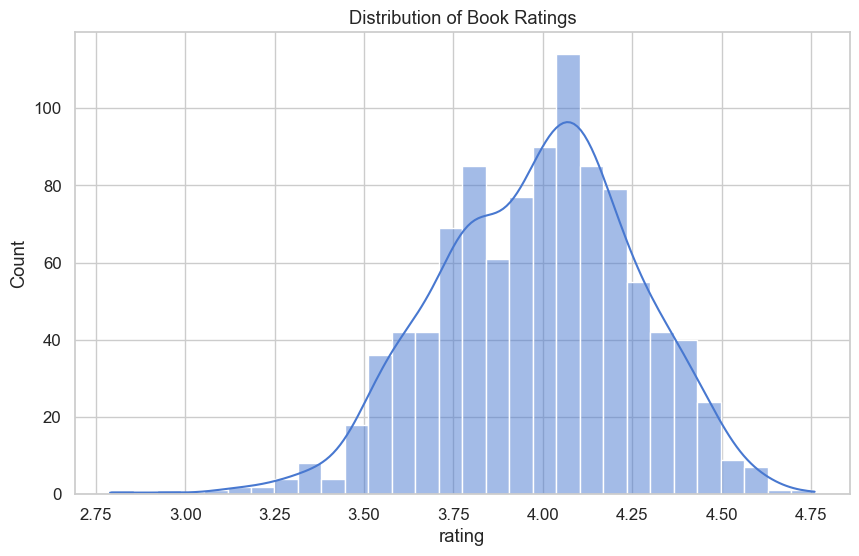

In [23]:
#Distribution of rating
plt.figure(figsize=(10, 6))
sns.histplot(df["rating"], bins=30, kde=True)
plt.title("Distribution of Book Ratings")

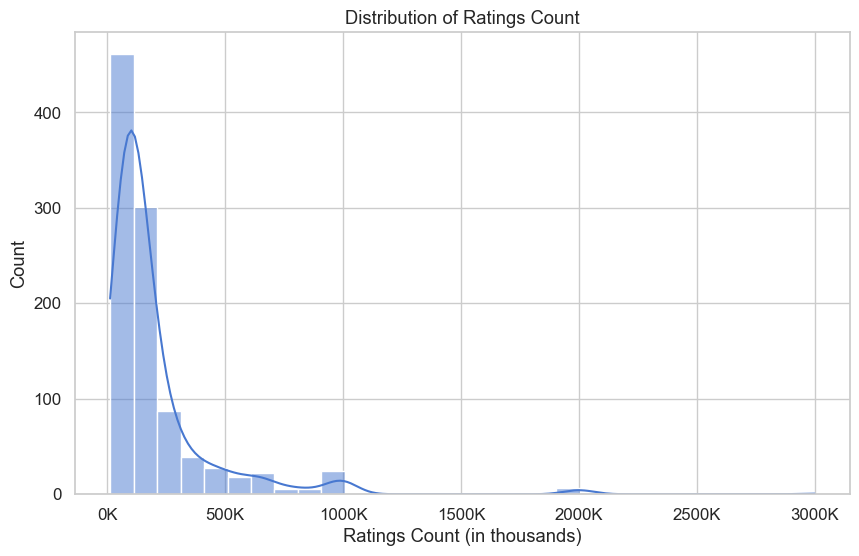

In [29]:


# Distribution of rating count i.e. popularity by 1000s
plt.figure(figsize=(10, 6))
sns.histplot(df["ratings_count"], bins=30, kde=True)

# Format x-axis in thousands
formatter = FuncFormatter(lambda x, _: f'{x/1000:.0f}K')
plt.gca().xaxis.set_major_formatter(formatter)

# Labels
plt.xlabel("Ratings Count (in thousands)")
plt.title("Distribution of Ratings Count")
plt.show()

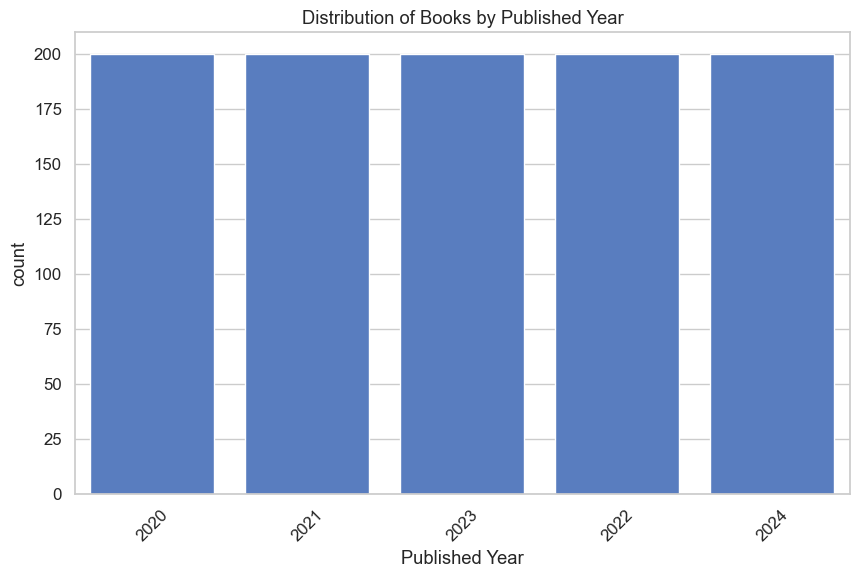

In [33]:
#Published year distribution in a pie chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="published_year", order=df["published_year"].value_counts().index)
plt.title("Distribution of Books by Published Year")
# Format x-axis to show years
plt.xticks(rotation=45)
plt.xlabel("Published Year")
plt.show()

Exactly 200 books in each year as data was collected.

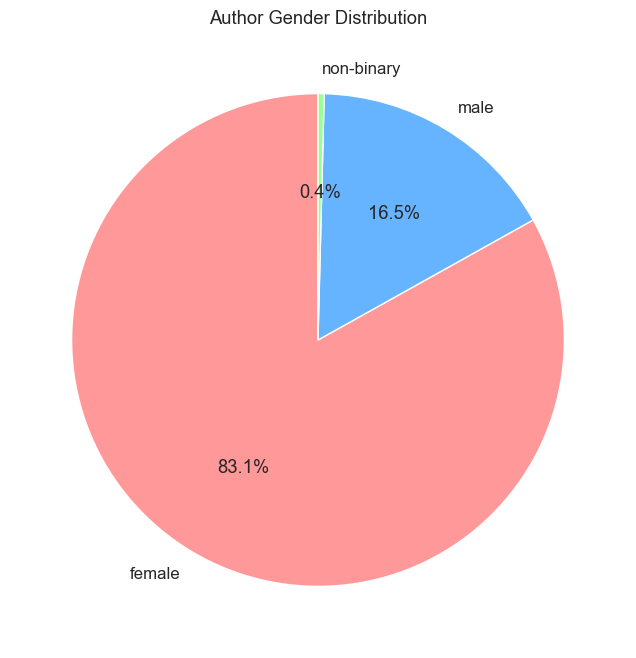

In [35]:
#Author gender distribution
import matplotlib.pyplot as plt

# Example data for author_gender distribution
author_gender_counts = df['author_gender'].value_counts()

# Define colors for each gender
colors = {
    'female': '#ff9999',  # Light red
    'male': '#66b3ff',    # Light blue
    'non-binary': '#99ff99'  # Light green
}

# Map colors to the gender categories
pie_colors = [colors[gender] for gender in author_gender_counts.index]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    author_gender_counts, 
    labels=author_gender_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=pie_colors
)

# Title
plt.title("Author Gender Distribution")
plt.show()

### Handling Author countries

In [36]:
df["author_country"]

0                       in Sheffield, The United Kingdom
1                                                    NaN
2                                                    NaN
3                     in New York, NY, The United States
4                     Tulsa, Oklahoma, The United States
                             ...                        
995                                               Canada
996                           London, The United Kingdom
997                                                  NaN
998                  in Lexington, MA, The United States
999    in Eastleigh, Hampshire, England, The United K...
Name: author_country, Length: 1000, dtype: object

In [48]:
# Precompiled list of country names from pycountry
country_list = [country.name.lower() for country in pycountry.countries]
    

# Function to clean and extract valid country names
def clean_country(country):
    if pd.isna(country) or country.strip() == '':
        return None  # Handle missing values
    
   
    # Normalize text
    country = country.lower().strip()
    
    # Remove cities, prepositions, and extra text using regex
    country = re.sub(r'(,|from|in|of|near|city|province|state|region).*', '', country).strip()
    
    # Validate country name using pycountry
    for valid_country in pycountry.countries:
        if valid_country.name.lower() == country or valid_country.alpha_2.lower() == country:
            return valid_country.name  # Return valid country name
    
    # Fuzzy match the cleaned text to the country list
    match, score = process.extractOne(country, country_list)
    if score >= 80:  # Set a threshold for matching accuracy
        return match.title()  # Return matched country name in title case
    
    return None  # Return None if no valid country is found

# Apply the cleaning function to the column
df['author_country_cleaned'] = df['author_country'].apply(clean_country)


KeyboardInterrupt: 

In [43]:
df["author_country_cleaned"].value_counts()

author_country_cleaned
Canada         16
Australia       9
New Zealand     2
Switzerland     2
Zimbabwe        2
Ireland         1
Malaysia        1
Name: count, dtype: int64